In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, beta

In [28]:
a = 5
b = 17
theta_lin = np.linspace(0, 1, 10_000)
prior = beta.pdf(theta_lin, a=a, b=b)
k = 66
n = 100
likelihood = np.array([binom.pmf(k=k, n=n, p=theta) for theta in theta_lin])
posterior = prior * likelihood

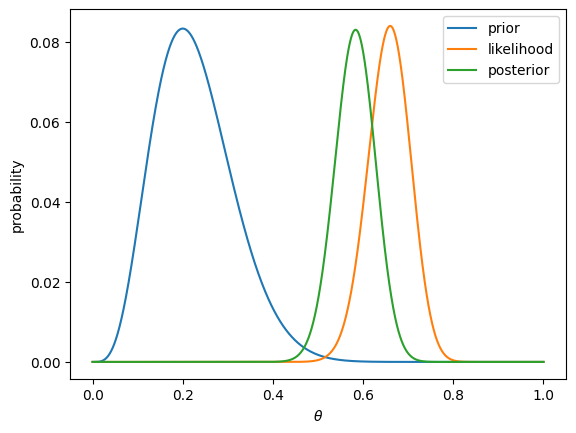

In [29]:
plt.plot(theta_lin, prior / 55, label="prior")
plt.plot(theta_lin, likelihood, label="likelihood")
plt.plot(theta_lin, posterior * 350, label="posterior")
plt.xlabel(r"$\theta$")
plt.ylabel("probability")
plt.legend()

In [33]:
def markov_step(X_t):
    return np.random.normal(loc=0.5 * X_t, scale=1)


X_t_start1 = 100
X_t_start2 = -27

X_t1 = X_t_start1
X_t2 = X_t_start2

X_t1_vals = []
X_t2_vals = []
for i in range(100):
    X_t1 = markov_step(X_t1)
    X_t2 = markov_step(X_t2)
    X_t1_vals.append(X_t1)
    X_t2_vals.append(X_t2)

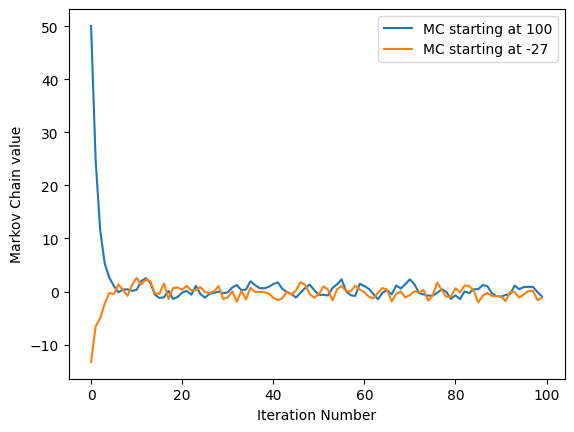

In [34]:
plt.plot(X_t1_vals, label=f"MC starting at {X_t_start1}")
plt.plot(X_t2_vals, label=f"MC starting at {X_t_start2}")
plt.xlabel("Iteration Number")
plt.ylabel("Markov Chain value")
plt.legend()

### Finding posterior using Metropolis-Hastings.
We repeat what we did before using a simple scan using Metropolis-Hastrings. Complete overkill for this problem, but good for illustration.

In [74]:
def theta_proposal(theta):
    assert theta >= 0 and theta <= 1, "Theta outside of valid range"
    theta_p = theta_p = theta + np.random.normal(loc=0, scale=0.3)
    while not (0 <= theta_p and theta_p <= 1):
        theta_p = theta + np.random.normal(loc=0, scale=0.3)
    return theta_p


def acceptance_ratio(theta, theta_p, a=a, b=b, k=k, n=n):
    prior_current = beta.pdf(theta, a=a, b=b)
    likelihood_current = binom.pmf(k=k, n=n, p=theta)
    prior_proposed = beta.pdf(theta_p, a=a, b=b)
    likelihood_proposed = binom.pmf(k=k, n=n, p=theta_p)
    posterior_current = prior_current * likelihood_current
    posterior_proposed = prior_proposed * likelihood_proposed
    r = posterior_proposed / posterior_current
    return r


def metropolis_hastings(theta, N, a=a, b=b, k=k, n=n):
    theta_vals = [theta]
    for i in range(N):
        theta_p = theta_proposal(theta)
        r = acceptance_ratio(theta, theta_p, a, b, k, n)
        if r >= 1:
            theta = theta_p
        else:
            rand_num = np.random.uniform()
            if r >= rand_num:
                theta = theta_p
            else:
                theta = theta
        theta_vals.append(theta)
    return theta_vals


theta_init = 0.1
N_mp = 2000
theta_mh = metropolis_hastings(theta_init, N_mp)

Text(0, 0.5, '$\\theta$')

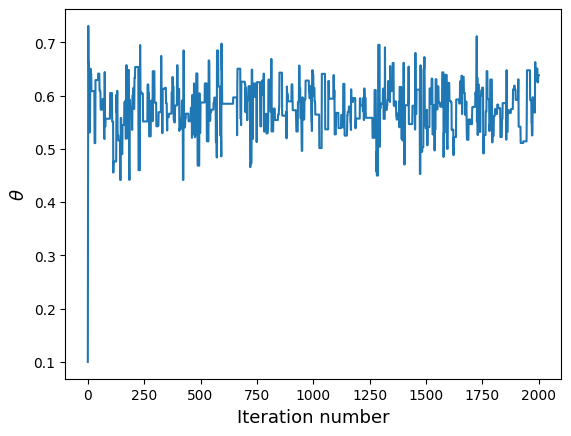

In [75]:
plt.plot(theta_mh)
plt.xlabel("Iteration number", fontsize=13)
plt.ylabel(r"$\theta$", fontsize=13)

Text(0, 0.5, 'Frequency')

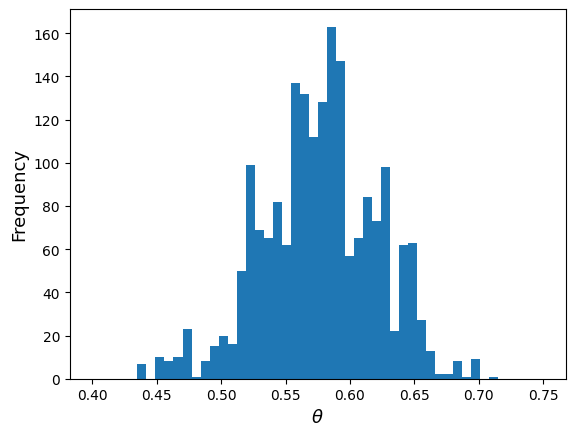

In [78]:
plt.hist(theta_mh[50:], bins=50, range=(0.40, 0.75))
plt.xlabel(r"$\theta$", fontsize=13)
plt.ylabel("Frequency", fontsize=13)